### Import necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Load and analysis the dataset 

In [2]:
df=pd.read_csv('house_price.csv')

In [3]:
df.head(5)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [4]:
df.shape

(29451, 12)

In [5]:
df.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [6]:
len(df[df.duplicated()])

401

In [7]:
df.drop_duplicates(keep='first',inplace=True)

In [8]:
len(df[df.duplicated()])

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29050 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29050 non-null  object 
 1   UNDER_CONSTRUCTION     29050 non-null  int64  
 2   RERA                   29050 non-null  int64  
 3   BHK_NO.                29050 non-null  int64  
 4   BHK_OR_RK              29050 non-null  object 
 5   SQUARE_FT              29050 non-null  float64
 6   READY_TO_MOVE          29050 non-null  int64  
 7   RESALE                 29050 non-null  int64  
 8   ADDRESS                29050 non-null  object 
 9   LONGITUDE              29050 non-null  float64
 10  LATITUDE               29050 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29050 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.9+ MB


In [10]:
df.isna().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [11]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29050.000000,29050.000000,29050.000000,2.905000e+04,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000
mean,0.178967,0.315869,2.390809,2.003171e+04,0.821033,0.930361,21.270272,76.829585,141.712677
std,0.383332,0.464869,0.880677,1.914411e+06,0.383332,0.254541,6.195973,10.567572,650.055763
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000000e+02,1.000000,1.000000,18.452663,73.794800,38.000000
50%,0.000000,0.000000,2.000000,1.172742e+03,1.000000,1.000000,20.631532,77.322873,61.750000
75%,0.000000,1.000000,3.000000,1.550169e+03,1.000000,1.000000,26.886881,77.912934,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [12]:
df.describe(include='O')

,POSTED_BY,BHK_OR_RK,ADDRESS
count,29050,29050,29050
unique,3,2,6899
top,Dealer,BHK,"Zirakpur,Chandigarh"
freq,17961,29026,474


In [13]:
df['RESALE'].value_counts()

1    27027
0     2023
Name: RESALE, dtype: int64

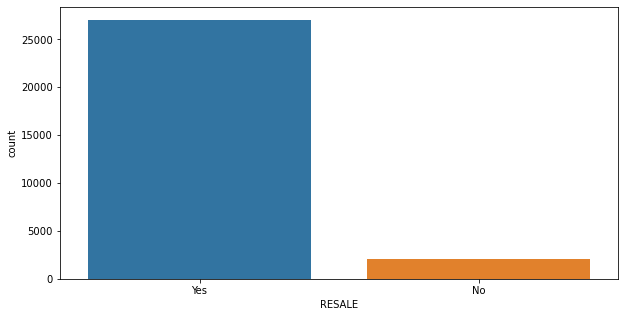

In [14]:
dfc=df.copy()
dfc['RESALE']=dfc['RESALE'].replace({0:'No',1:'Yes'})
plt.figure(figsize=(10,5))
sns.countplot(data=dfc,x='RESALE')
plt.show()

In [15]:
df['UNDER_CONSTRUCTION'].value_counts()

0    23851
1     5199
Name: UNDER_CONSTRUCTION, dtype: int64

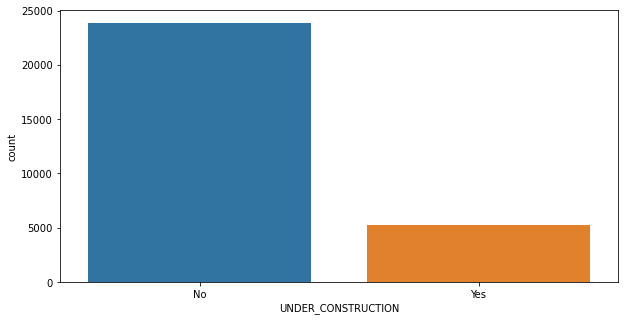

In [16]:
plt.figure(figsize=(10,5))
dfc['UNDER_CONSTRUCTION']=dfc['UNDER_CONSTRUCTION'].apply(lambda i: 'No' if i==0 else 'Yes')
sns.countplot(data=dfc,x='UNDER_CONSTRUCTION',tick_label=['No', 'Yes'])
plt.show()

In [17]:
df['POSTED_BY'].value_counts()

Dealer     17961
Owner      10470
Builder      619
Name: POSTED_BY, dtype: int64

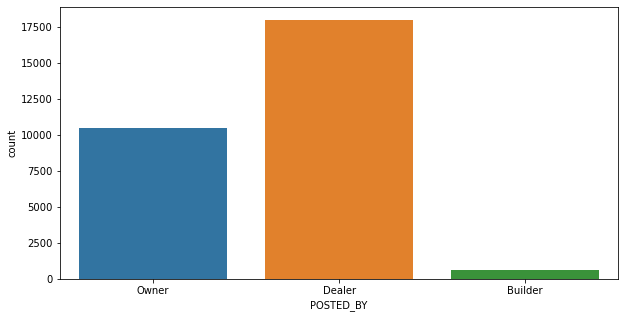

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='POSTED_BY')
plt.show()

Most of the house price is posted by the dealer.

In [19]:
df['BHK_OR_RK'].value_counts()

BHK    29026
RK        24
Name: BHK_OR_RK, dtype: int64

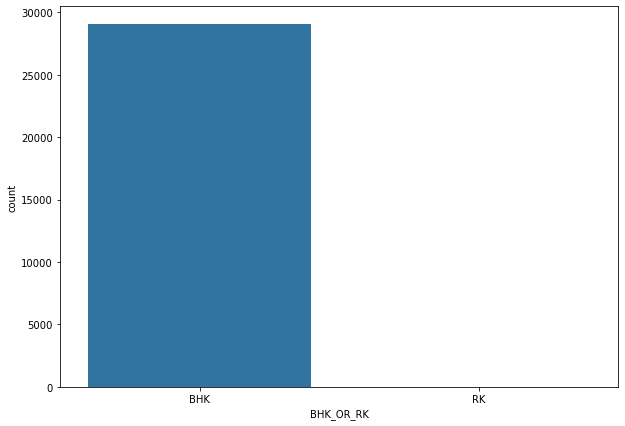

In [20]:
plt.figure(figsize=(10,7))
sns.countplot(data=df,x='BHK_OR_RK')
plt.show()

In [21]:
df['ADDRESS'].value_counts()

Zirakpur,Chandigarh                       474
Whitefield,Bangalore                      222
Raj Nagar Extension,Ghaziabad             212
Sector-137 Noida,Noida                    136
New Town,Kolkata                          129
                                         ... 
haripur phutkuwan Rampur Road,Haldwani      1
Kolshet,Lalitpur                            1
Ambika Township,Jivarajpark,Rajkot          1
Cheranalloor,Kochi                          1
E3-108, Lake View Recidency,,Vapi           1
Name: ADDRESS, Length: 6899, dtype: int64

In [22]:
df['ADDRESS']= df['ADDRESS'].str.split(',').str[-1]

In [23]:
df.head(5)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,Bangalore,12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,Mysore,12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,Bangalore,12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,Ghaziabad,28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,Kolkata,22.592200,88.484911,60.5


In [24]:
df['ADDRESS'].unique()

array(['Bangalore', 'Mysore', 'Ghaziabad', 'Kolkata', 'Kochi', 'Jaipur',
       'Mohali', 'Chennai', 'Siliguri', 'Noida', 'Raigad', 'Bhubaneswar',
       'Wardha', 'Pune', 'Mumbai', 'Nagpur', 'Deoghar', 'Bhiwadi',
       'Faridabad', 'Lalitpur', 'Maharashtra', 'Vadodara',
       'Visakhapatnam', 'Vapi', 'Mangalore', 'Aurangabad', 'Ottapalam',
       'Vijayawada', 'Belgaum', 'Bhopal', 'Lucknow', 'Kanpur',
       'Gandhinagar', 'Pondicherry', 'Agra', 'Ranchi', 'Gurgaon', 'Udupi',
       'Indore', 'Jodhpur', 'Coimbatore', 'Valsad', 'Palghar', 'Surat',
       'Varanasi', 'Guwahati', 'Amravati', 'Anand', 'Tirupati',
       'Secunderabad', 'Raipur', 'Vizianagaram', 'Thrissur', 'Satna',
       'Madurai', 'Chandigarh', 'Shimla', 'Gwalior', 'Rajkot', 'Sonipat',
       'Allahabad', 'Berhampur', 'Roorkee', 'Dharuhera', 'Latur',
       'Durgapur', 'Panchkula', 'Solapur', 'Durg', 'Goa', 'Jamshedpur',
       'Hazaribagh', 'Jabalpur', 'Hosur', 'Morbi', 'Hubli', 'Karnal',
       'Patna', 'Bilaspur', '

In [25]:
df['ADDRESS'].nunique()

256

In [26]:
def city_type(city):
    
    if city in ['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Pune']:
        return 'tier1'
    
    elif city in ['Agra', 'Ajmer', 'Aligarh', 'Amravati', 'Amritsar', 'Asansol', 'Aurangabad', 'Bareilly', 'Belgaum', 'Bhavnagar', 'Bhilai', 'Bhiwandi', 'Bhopal', 'Bhubaneswar', 'Bijapur', 'Bikaner', 'Bilaspur', 'Bokaro Steel City', 'Chandigarh', 'Coimbatore', 'Cuttack', 'Dehradun', 'Dhanbad', 'Dindigul', 'Durgapur', 'Erode', 'Faridabad', 'Firozabad', 'Ghaziabad', 'Gorakhpur', 'Gulbarga', 'Guntur', 'Gurgaon', 'Guwahati', 'Gwalior', 'Hamirpur', 'Hubli–Dharwad', 'Indore', 'Jabalpur', 'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 'Jhansi', 'Jodhpur', 'Kakinada', 'Kannur', 'Kanpur', 'Karnal', 'Kochi', 'Kolhapur', 'Kollam', 'Kozhikode', 'Kurnool', 'Lucknow', 'Ludhiana', 'Madurai', 'Malappuram', 'Mangalore', 'Mathura', 'Meerut', 'Moradabad', 'Mysore', 'Nagpur', 'Nanded', 'Nashik', 'Nellore', 'Noida', 'Patna', 'Pondicherry', 'Prayagraj', 'Purulia', 'Raipur', 'Rajahmundry', 'Rajkot', 'Ranchi', 'Ratlam', 'Rourkela', 'Salem', 'Sangli', 'Shimla', 'Siliguri', 'Solapur', 'Srinagar', 'Surat', 'Thanjavur', 'Thiruvananthapuram', 'Thrissur', 'Tiruchirappalli', 'Tirunelveli', 'Tiruvannamalai', 'Ujjain', 'Vadodara', 'Varanasi', 'Vasai-Virar City', 'Vellore', 'Vijayawada', 'Visakhapatnam', 'Warangal']:
        return 'tier2'
    
    else:
        return 'tier3'

In [27]:
df['City_type']=df['ADDRESS'].apply(city_type)

In [28]:
df.head(4)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),City_type
0,Owner,0,0,2,BHK,1300.236407,1,1,Bangalore,12.969910,77.597960,55.0,tier1
1,Dealer,0,0,2,BHK,1275.000000,1,1,Mysore,12.274538,76.644605,51.0,tier2
2,Owner,0,0,2,BHK,933.159722,1,1,Bangalore,12.778033,77.632191,43.0,tier1
3,Owner,0,1,2,BHK,929.921143,1,1,Ghaziabad,28.642300,77.344500,62.5,tier2


<AxesSubplot:xlabel='City_type', ylabel='count'>

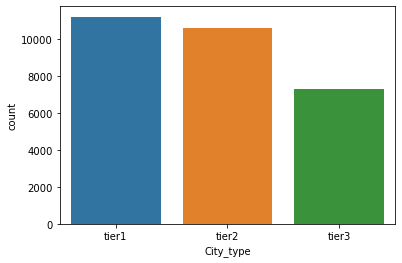

In [29]:
sns.countplot(data=df,x='City_type')

In [30]:
df.drop(columns='ADDRESS',inplace=True)

In [31]:
df.head(4)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),City_type
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0,tier1
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0,tier2
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0,tier1
3,Owner,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,62.5,tier2


In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
encoder = LabelEncoder()
df["City_type"]= encoder.fit_transform(df["City_type"])

In [34]:
df['BHK_OR_RK']=pd.get_dummies(df['BHK_OR_RK']).values

In [35]:
df.head(3)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),City_type
0,Owner,0,0,2,1,1300.236407,1,1,12.969910,77.597960,55.0,0
1,Dealer,0,0,2,1,1275.000000,1,1,12.274538,76.644605,51.0,1
2,Owner,0,0,2,1,933.159722,1,1,12.778033,77.632191,43.0,0


In [36]:
df['BHK_OR_RK'].value_counts()

1    29026
0       24
Name: BHK_OR_RK, dtype: int64

In [37]:
Posted_by=pd.get_dummies(df['POSTED_BY'],drop_first=True)
Posted_by.head(5)

,Dealer,Owner
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [38]:
df.drop('POSTED_BY',axis=1,inplace=True)
df=pd.concat([df,Posted_by],axis=1)

In [39]:
df.head(5)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),City_type,Dealer,Owner
0,0,0,2,1,1300.236407,1,1,12.969910,77.597960,55.0,0,0,1
1,0,0,2,1,1275.000000,1,1,12.274538,76.644605,51.0,1,1,0
2,0,0,2,1,933.159722,1,1,12.778033,77.632191,43.0,0,0,1
3,0,1,2,1,929.921143,1,1,28.642300,77.344500,62.5,1,0,1
4,1,0,2,1,999.009247,0,1,22.592200,88.484911,60.5,0,1,0


In [40]:
df.shape

(29050, 13)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29050 entries, 0 to 29450
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UNDER_CONSTRUCTION     29050 non-null  int64  
 1   RERA                   29050 non-null  int64  
 2   BHK_NO.                29050 non-null  int64  
 3   BHK_OR_RK              29050 non-null  uint8  
 4   SQUARE_FT              29050 non-null  float64
 5   READY_TO_MOVE          29050 non-null  int64  
 6   RESALE                 29050 non-null  int64  
 7   LONGITUDE              29050 non-null  float64
 8   LATITUDE               29050 non-null  float64
 9   TARGET(PRICE_IN_LACS)  29050 non-null  float64
 10  City_type              29050 non-null  int32  
 11  Dealer                 29050 non-null  uint8  
 12  Owner                  29050 non-null  uint8  
dtypes: float64(4), int32(1), int64(5), uint8(3)
memory usage: 2.4 MB


In [42]:
new_data_types={'BHK_OR_RK':int,'Dealer':int,'Owner':int}

In [43]:
df=df.astype(new_data_types)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29050 entries, 0 to 29450
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UNDER_CONSTRUCTION     29050 non-null  int64  
 1   RERA                   29050 non-null  int64  
 2   BHK_NO.                29050 non-null  int64  
 3   BHK_OR_RK              29050 non-null  int32  
 4   SQUARE_FT              29050 non-null  float64
 5   READY_TO_MOVE          29050 non-null  int64  
 6   RESALE                 29050 non-null  int64  
 7   LONGITUDE              29050 non-null  float64
 8   LATITUDE               29050 non-null  float64
 9   TARGET(PRICE_IN_LACS)  29050 non-null  float64
 10  City_type              29050 non-null  int32  
 11  Dealer                 29050 non-null  int32  
 12  Owner                  29050 non-null  int32  
dtypes: float64(4), int32(4), int64(5)
memory usage: 2.7 MB


### Split the dataset 

In [45]:
X=df.drop('TARGET(PRICE_IN_LACS)',axis=1)
Y=df['TARGET(PRICE_IN_LACS)']

In [46]:
X.shape

(29050, 12)

In [47]:
Y.shape

(29050,)

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [49]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(20335, 12) (8715, 12) (20335,) (8715,)


In [50]:
X_train.head(5)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,City_type,Dealer,Owner
8090,0,1,3,1,1575.013348,1,1,28.919600,76.897200,1,1,0
10543,0,0,3,1,1534.919417,1,1,12.885657,77.661476,0,1,0
20968,0,0,3,1,1525.423729,1,1,21.170000,72.830000,1,0,1
4045,1,0,3,1,1103.102476,0,1,22.750000,88.366670,0,1,0
4874,0,0,2,1,950.161348,1,1,23.833330,91.266670,2,0,1


### Scaling 

In [51]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train.iloc[:,[4,7,8]]=sc.fit_transform(X_train.iloc[:,[4,7,8]])
X_test.iloc[:,[4,7,8]]=sc.transform(X_test.iloc[:,[4,7,8]])

In [52]:
X_train.head(5)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,City_type,Dealer,Owner
8090,0,1,3,1,-0.009064,1,1,1.240419,0.007136,1,1,0
10543,0,0,3,1,-0.009086,1,1,-1.353372,0.079181,0,1,0
20968,0,0,3,1,-0.009091,1,1,-0.013224,-0.376258,1,0,1
4045,1,0,3,1,-0.009316,0,1,0.242370,1.088304,0,1,0
4874,0,0,2,1,-0.009398,1,1,0.417619,1.361672,2,0,1


### Linear Regression 

In [53]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [54]:
Y_train_pred=lr.predict(X_train)
Y_test_pred=lr.predict(X_test)

In [55]:
from sklearn.metrics import r2_score
print('Train R2-score:',r2_score(Y_train,Y_train_pred))
print('Test R2-score:',r2_score(Y_test,Y_test_pred))

Train R2-score: 0.21264293306612037
Test R2-score: 0.280255012828152


### Decision Tree 

In [56]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [57]:
Y_train_pred=dt.predict(X_train)
Y_test_pred=dt.predict(X_test)

In [58]:
print('Train R2-score:',r2_score(Y_train,Y_train_pred))
print('Test R2-score:',r2_score(Y_test,Y_test_pred))

Train R2-score: 0.9998271129175159
Test R2-score: 0.931550169070423


### Random Forest 

In [59]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [60]:
Y_train_pred=rf.predict(X_train)
Y_test_pred=rf.predict(X_test)

In [61]:
print('Train R2-score:',r2_score(Y_train,Y_train_pred))
print('Test R2-score:',r2_score(Y_test,Y_test_pred))

Train R2-score: 0.9836286185643691
Test R2-score: 0.9422219447867304


### Conclusion

- We use 3 models Linear regression, Decision Tree Regressor and Random Forest Regressor.
- Linear Regression giving poor result.
- Decision Tree Regressor and Random Forest Regressor giving decent results infact very good accuracy.